In [15]:
import numpy as np
import scipy.stats as st
import netCDF4 as nc
import datetime
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import csv
import multiprocessing
import matplotlib.cm as cm
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER

In [6]:
test_set = nc.Dataset('../data/3B42_Daily.20181219.7.nc4')
lat = test_set['lat'][:]
lon = test_set['lon'][:]

In [7]:
with open('../data/percentile.txt', 'r') as file:
    # Read the file and load its contents as a NumPy array
    percen = np.loadtxt(file)

In [8]:
percen_grid = percen.reshape(400, 1440)
percen_grid.shape

(400, 1440)

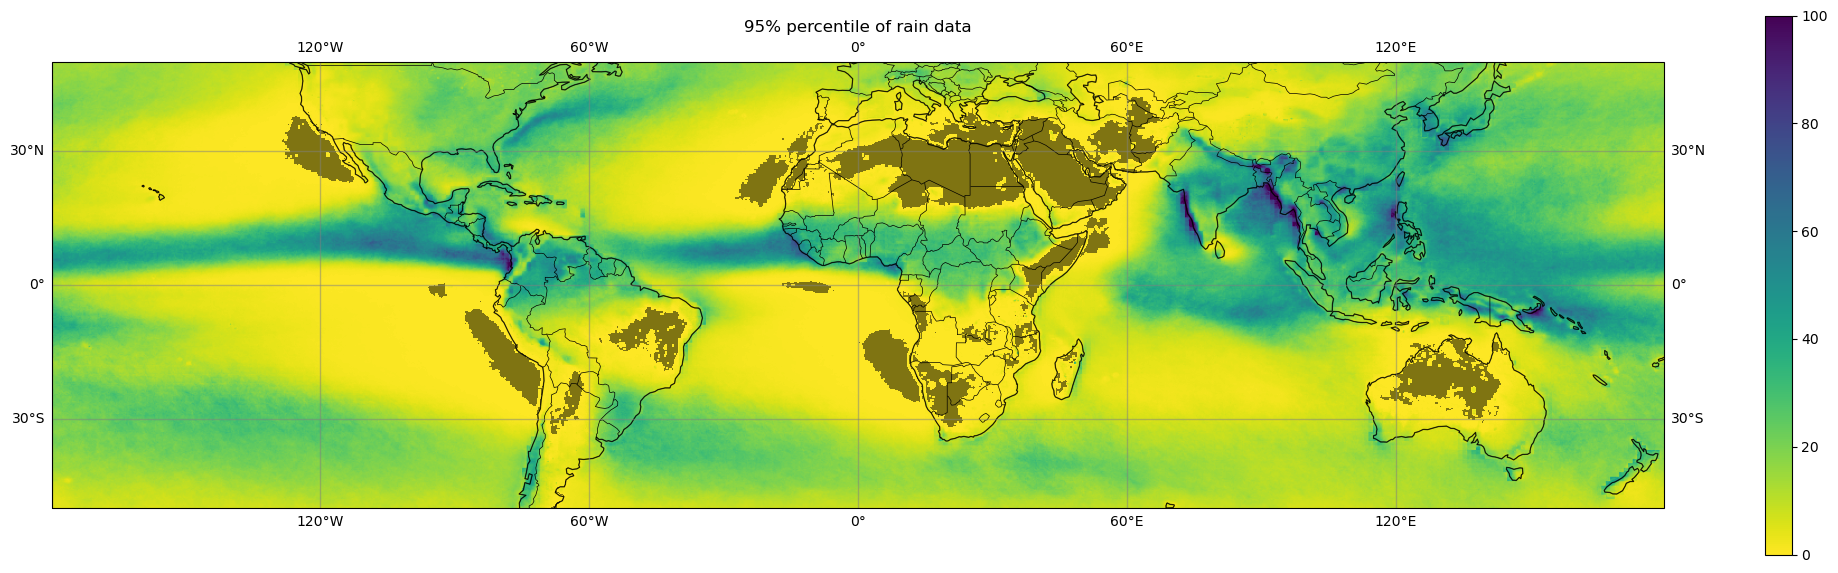

In [90]:
# Define the figure and axis with a specific projection
fig, ax = plt.subplots(figsize=(26, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Define the extent of the world map
extent = [-179.875, 179.875, -49.875, 49.875]
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linewidth=0.5)
ax.add_feature(cfeature.LAND, facecolor='lightgray')
# Plot the array on the map
img = ax.imshow(percen_grid, cmap='viridis_r', origin='lower', extent=extent, transform=ccrs.PlateCarree(), norm=plt.Normalize(vmin=0, vmax=100))

# Add a colorbar
cbar = plt.colorbar(img, shrink=0.7)
# Add grid
# Add coastlines
ax.coastlines(alpha = 0.5)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5)
gl.xlocator = mticker.FixedLocator([n for n in range(-180, 180, 60)])
gl.ylocator = mticker.FixedLocator([-30, 0, 30])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

mask = np.where(percen_grid == 0, 1, np.nan)
ax.imshow(mask, cmap='gray', origin='lower', extent=extent, transform=ccrs.PlateCarree(), alpha=0.5)

# Set the title
ax.set_title('95% percentile of rain data')
# Show the plot
plt.savefig('Figure1_a.jpg',dpi=300)
plt.show()



In [1]:
# Define the figure and axis with a specific projection
fig, ax = plt.subplots(figsize=(13, 5), subplot_kw={'projection': ccrs.LambertConformal()})

# Define the extent of the world map
extent = [-179.875, 179.875, -49.875, 49.875]
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linewidth=0.5)
ax.add_feature(cfeature.LAND, facecolor='lightgray')
# Plot the array on the map
ax.set_extent(extent, crs=ccrs.PlateCarree())
img = ax.imshow(percen_grid, cmap='viridis_r', origin='lower', extent=extent, transform=ccrs.PlateCarree(), norm=plt.Normalize(vmin=0, vmax=100))

# Add a colorbar
cbar = plt.colorbar(img, shrink=0.7)
# Add grid
# Add coastlines
ax.coastlines(alpha = 0.5)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5)
gl.xlocator = mticker.FixedLocator([n for n in range(-180, 180, 60)])
gl.ylocator = mticker.FixedLocator([-30, 0, 30])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

# Set the title
ax.set_title('95% percentile of rain data')
# Show the plot
plt.savefig('Figure1_a.jpg')
plt.show()



NameError: name 'plt' is not defined

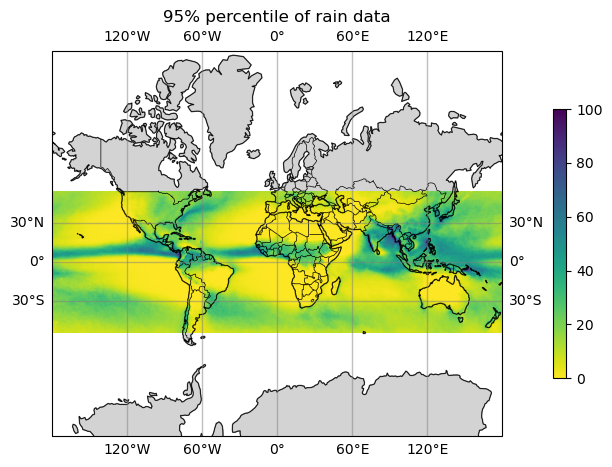

In [12]:
# Define the figure and axis with a specific projection
fig, ax = plt.subplots(figsize=(13, 5), subplot_kw={'projection': ccrs.Mercator()})

# Define the extent of the world map
extent = [-179.875, 179.875, -49.875, 49.875]
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linewidth=0.5)
ax.add_feature(cfeature.LAND, facecolor='lightgray')
# Plot the array on the map
img = ax.imshow(percen_grid, cmap='viridis_r', origin='lower', extent=extent, transform=ccrs.PlateCarree(), norm=plt.Normalize(vmin=0, vmax=100))

# Add a colorbar
cbar = plt.colorbar(img, shrink=0.7)
# Add grid
# Add coastlines
ax.coastlines(alpha = 0.5)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5)
gl.xlocator = mticker.FixedLocator([n for n in range(-180, 180, 60)])
gl.ylocator = mticker.FixedLocator([-30, 0, 30])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

# Set the title
ax.set_title('95% percentile of rain data')
# Show the plot
plt.savefig('Figure1_a.jpg')
plt.show()



In [ ]:
import numpy as np
import scipy.stats as st
import netCDF4 as nc
import datetime

def LoadNc4Data(path : str, variable_name : str, years_begin : int, years_end : int, months_start : str, months_duration : int, output_data = False):
    test_set = nc.Dataset(path)
    data = test_set[variable_name][:]
    lat = test_set['lat'][:]
    lon = test_set['lon'][:]

    pcp_whole = []
    dates_whole = []

    if months_start == "January": months_start_int = 1
    elif months_start == "February": months_start_int = 2
    elif months_start == "March": months_start_int = 3
    elif months_start == "April": months_start_int = 4
    elif months_start == "May": months_start_int = 5
    elif months_start == "June": months_start_int = 6
    elif months_start == "July": months_start_int = 7
    elif months_start == "August": months_start_int = 8
    elif months_start == "September": months_start_int = 9
    elif months_start == "October": months_start_int = 10 
    elif months_start == "November": months_start_int = 11
    elif months_start == "December": months_start_int = 12

    # JJA = 92
    for year in range(years_begin,years_end):
        # set the start day
        date = datetime.date(year,months_start_int,1)

        for _ in range(months_duration):
            nc_data = nc.Dataset(date.strftime("%Y%m%d") + '.nc4')

            pcp_whole.append(nc_data[variable_name][:])
            dates_whole.append(date.strftime("%Y%m%d"))

            date = date + datetime.timedelta(days=1)

    if output_data == True:
        np.savetxt("output_for_check_lat.csv", lat, delimiter=",")
        np.savetxt("output_for_check_lon.csv", lon, delimiter=",")
        np.savetxt("output_for_check_pcp_whole.csv", pcp_whole, delimiter=",")
        np.savetxt("output_for_check_dates_whole.csv", dates_whole, delimiter=",")

    return lat, lon, pcp_whole, dates_whole

In [55]:
import pickle

with open("../data/ERE_start_days", "rb") as fp:   # Unpickling
    ERE_data = pickle.load(fp)


In [71]:
ERE_np = np.empty((1440, 400))

for lon in range(len(ERE_data)):
    for lat in range(len(ERE_data[0])):
        if isinstance(ERE_data[lon][lat], list):
            ERE_np[lon,lat] = len(ERE_data[lon][lat])
        else:
            ERE_np[lon,lat] = 1
 


(1440, 400) -> (400, 1440)
max : 78.0
max : 1.0


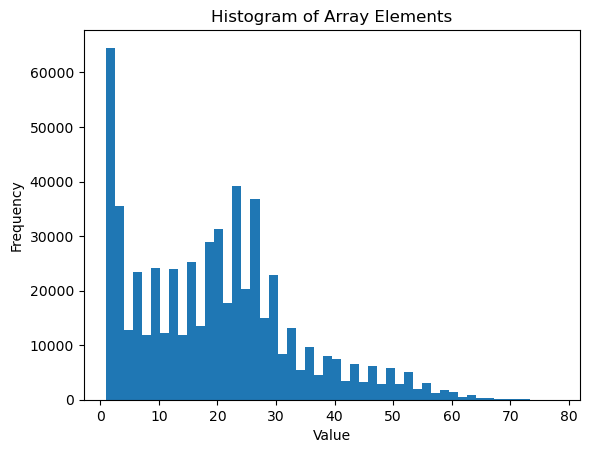

In [83]:
import numpy as np
import matplotlib.pyplot as plt

ERE_npT = np.transpose(ERE_np)

print(f"{ERE_np.shape} -> {ERE_npT.shape}")
print(f"max : {np.amax(ERE_npT)}")
print(f"max : {np.amin(ERE_npT)}")

# ヒストグラムを表示
plt.hist(ERE_npT.flatten(), bins=50)  # 配列を1次元化してヒストグラムを作成
plt.xlabel('Value')
plt.ylabel('Number')
plt.title('Histogram of ERE number')
plt.show()


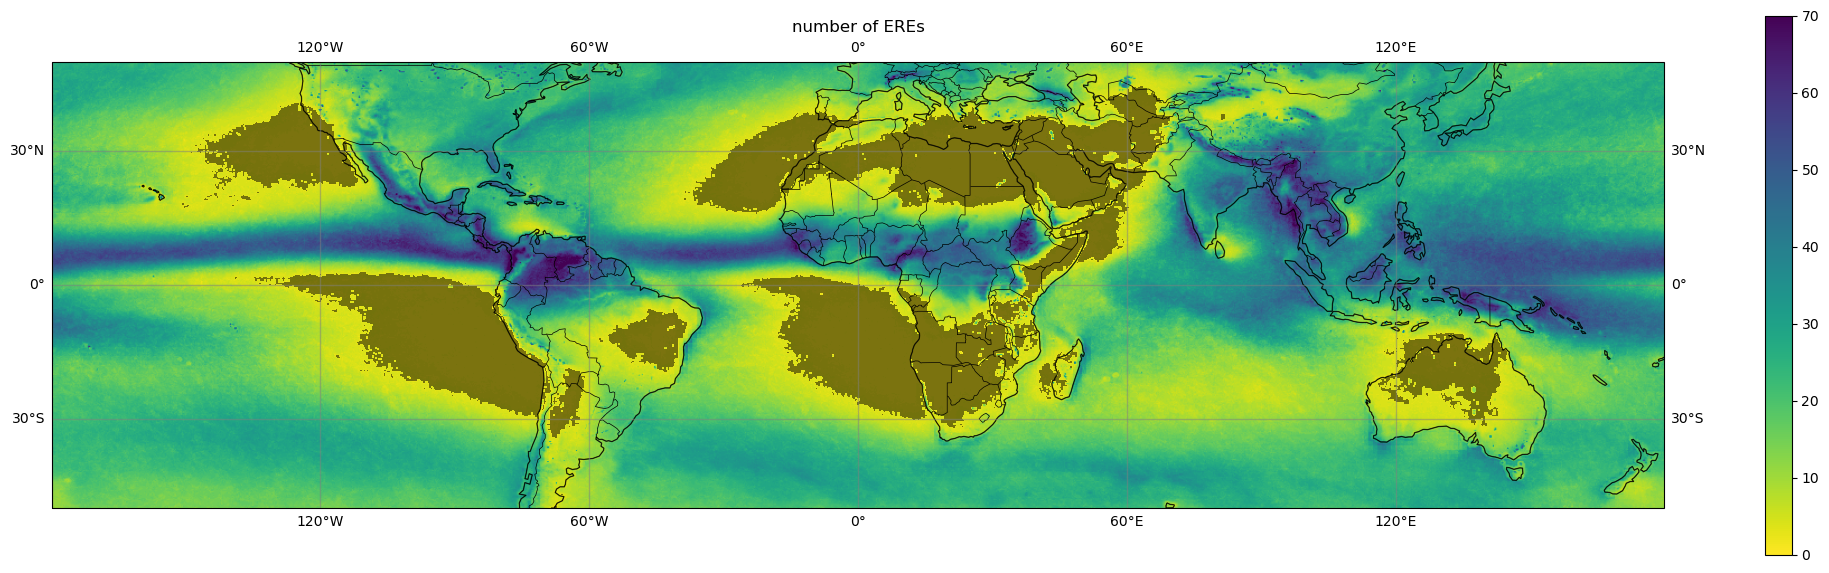

In [91]:
# Define the figure and axis with a specific projection
fig, ax = plt.subplots(figsize=(26, 10), subplot_kw={'projection': ccrs.PlateCarree()})

# Define the extent of the world map
extent = [-179.875, 179.875, -49.875, 49.875]
ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
ax.add_feature(cfeature.BORDERS, linewidth=0.5)
ax.add_feature(cfeature.LAND, facecolor='lightgray')
# Plot the array on the map
img = ax.imshow(ERE_npT, cmap='viridis_r', origin='lower', extent=extent, transform=ccrs.PlateCarree(), norm=plt.Normalize(vmin=0, vmax=70))

# Add a colorbar
cbar = plt.colorbar(img, shrink=0.7)
# Add grid
# Add coastlines
ax.coastlines(alpha = 0.5)
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=True,
                  linewidth=1, color='gray', alpha=0.5)
gl.xlocator = mticker.FixedLocator([n for n in range(-180, 180, 60)])
gl.ylocator = mticker.FixedLocator([-30, 0, 30])
gl.xformatter = LONGITUDE_FORMATTER
gl.yformatter = LATITUDE_FORMATTER

mask = np.where(ERE_npT <=3 , 1, np.nan)
ax.imshow(mask, cmap='gray', origin='lower', extent=extent, transform=ccrs.PlateCarree(), alpha=0.5)

# Set the title
ax.set_title('number of EREs')
# Show the plot
plt.savefig('Figure1_a.jpg',dpi=300)
plt.show()

